In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import norm
import math
import pickle
import glob

In [3]:
def create_acc_mtrx(file):
    acc_list = []
    with open(file) as f:
        content = f.readlines()
        target_line = [l for l in content if l.startswith('Test set:')]
        acc_list = [float(l.split('(')[-1].split('%')[0]) for l in target_line]
        
    return np.asarray(acc_list)

In [4]:
imp_node_result = create_acc_mtrx(file = '/Users/mac/Desktop/DropConnect_DPP/CIFAR_dpp/importance_node_CIFAR_0.0_batch128_output_round1.txt')
imp_edge_result = create_acc_mtrx(file = '/Users/mac/Desktop/DropConnect_DPP/CIFAR_dpp/importance_edge_CIFAR_0.0_batch128_output_round1.txt')

print(imp_node_result.shape)
print(imp_edge_result.shape)

(9,)
(9,)


In [5]:
dpp_node_result = np.loadtxt('./CIFAR_DPP_node_0.0_batch128_results.csv', delimiter=',')
print(dpp_node_result.shape)

dpp_node_mean = np.mean(dpp_node_result, axis = 1)
dpp_node_std = np.std(dpp_node_result, axis = 1)

print(dpp_node_mean.shape, dpp_node_std.shape)

(9, 10)
(9,) (9,)


In [6]:
dpp_edge_result = np.loadtxt('./CIFAR_DPP_edge_0.0_batch128_results.csv', delimiter=',')
print(dpp_edge_result.shape)

dpp_edge_mean = np.mean(dpp_edge_result, axis = 1)
dpp_edge_std = np.std(dpp_edge_result, axis = 1)

(9, 10)


In [7]:
rand_edge_result = np.loadtxt('./CIFAR_rand_edge_0.0_batch128_results.csv', delimiter=',')
print(rand_edge_result.shape)

rand_edge_mean = np.mean(rand_edge_result, axis = 1)
rand_edge_std = np.std(rand_edge_result, axis = 1)

(9, 10)


Text(0.5, 1.0, 'CIFAR10 Test Accuracy')

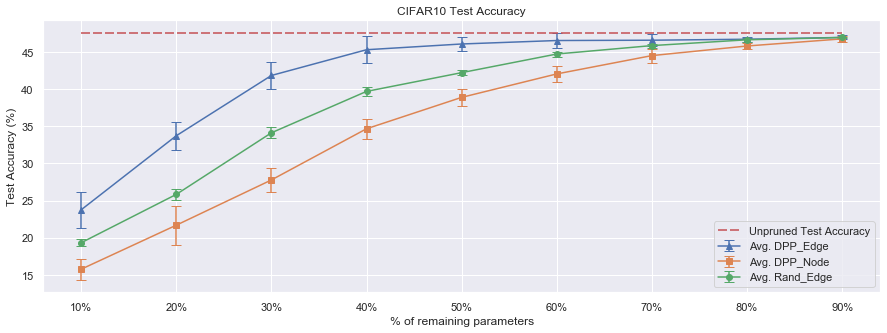

In [8]:
fig, axs = plt.subplots(1, 1, sharey = True, tight_layout = False, figsize=(15,5))

#     plt.xticks(rotation = 90)
#     axs.set_xticklabels(time_stamp)
# axs.set_xscale('log')

x = [str(i * 10) + '%' for i in range(1, 10)]
axs.errorbar(x, dpp_edge_mean, yerr = dpp_edge_std, marker = '^', color = 'b', capsize=5, label = 'Avg. DPP_Edge')
axs.errorbar(x, dpp_node_mean, yerr = dpp_node_std, marker = 's', color = 'g', capsize=5, label = 'Avg. DPP_Node')
axs.errorbar(x, rand_edge_mean, yerr = rand_edge_std, marker = 'o', color = 'r', capsize=5, label = 'Avg. Rand_Edge')

# axs.plot(x, imp_node_result, marker = 'x', label = 'Importance Node')
# axs.plot(x, imp_edge_result, marker = '+', label = 'Importance Edge')

axs.plot(x, [47.6 for i in x], dashes=[6, 2], color = 'k', label="Unpruned Test Accuracy")

axs.set_xlabel('% of remaining parameters')
axs.set_ylabel('Test Accuracy (%)')
axs.legend(loc = 'best')

title = 'CIFAR10 Test Accuracy'
axs.set_title(title)

In [9]:
node_rwt_results = np.loadtxt('./CIFAR_DPP_node_rwt_0.0_batch128_results.csv', delimiter=',')
print(node_rwt_results.shape)

node_rwt_mean = np.mean(node_rwt_results, axis = 1)
node_rwt_std = np.std(node_rwt_results, axis = 1)

print(node_rwt_mean.shape, node_rwt_std.shape)

(9, 7)
(9,) (9,)


In [10]:
edge_rwt_all = np.loadtxt('./CIFAR_DPP_edge_rwt_0.0_batch128_results.csv', delimiter=',')

edge_rwt_mean = np.mean(edge_rwt_all, axis = 1)
edge_rwt_std = np.std(edge_rwt_all, axis = 1)

print(edge_rwt_mean.shape, edge_rwt_std.shape)

(9,) (9,)


Text(0.5, 1.0, 'CIFAR10 Test Accuracy')

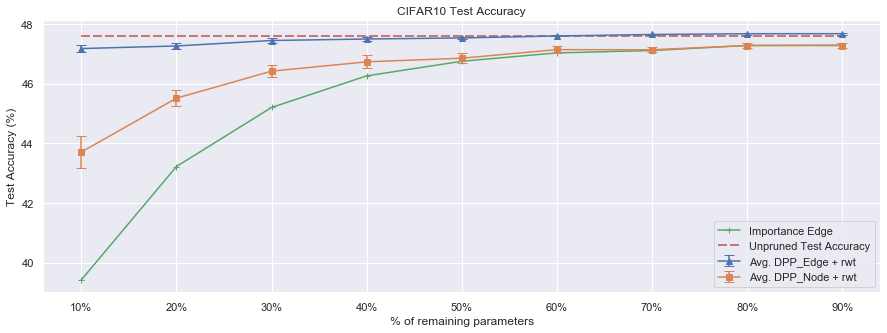

In [11]:
fig, axs = plt.subplots(1, 1, sharey = True, tight_layout = False, figsize=(15,5))

x = [str(i * 10) + '%' for i in range(1, 10)]
axs.errorbar(x, edge_rwt_mean, yerr = edge_rwt_std, fmt = '--', marker = '^', color = 'b', capsize=5, label = 'Avg. DPP_Edge + rwt')
axs.errorbar(x, node_rwt_mean, yerr = node_rwt_std, fmt = '--', marker = 's', color = 'g', capsize=5, label = 'Avg. DPP_Node + rwt')

# axs.plot(x, imp_node_result, marker = 'x', label = 'Importance Node')
axs.plot(x, imp_edge_result, marker = '+', color = 'c', label = 'Importance Edge')

axs.plot(x, [47.6 for i in x], dashes=[6, 2], color = 'k', label="Unpruned Test Accuracy")

axs.set_xlabel('% of remaining parameters')
axs.set_ylabel('Test Accuracy (%)')
axs.legend(loc = 'best')

title = 'CIFAR10 Test Accuracy'
axs.set_title(title)

Text(0.5, 1.0, 'CIFAR10 Test Accuracy')

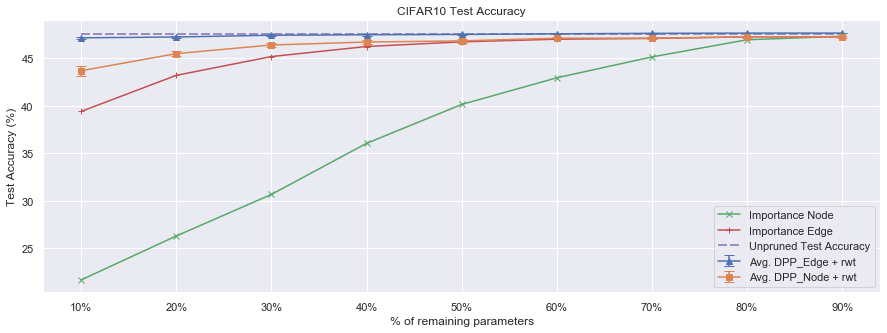

In [12]:
fig, axs = plt.subplots(1, 1, sharey = True, tight_layout = False, figsize=(15,5))

x = [str(i * 10) + '%' for i in range(1, 10)]
axs.errorbar(x, edge_rwt_mean, yerr = edge_rwt_std, fmt = '--', marker = '^', color = 'b', capsize=5, label = 'Avg. DPP_Edge + rwt')
axs.errorbar(x, node_rwt_mean, yerr = node_rwt_std, fmt = '--', marker = 's', color = 'g', capsize=5, label = 'Avg. DPP_Node + rwt')
# axs.errorbar(x, rand_edge_mean, yerr = rand_edge_std, marker = 'o', capsize=5, label = 'Avg. Rand_Edge')

axs.plot(x, imp_node_result, marker = 'x', color = 'm', label = 'Importance Node')
axs.plot(x, imp_edge_result, marker = '+', color = 'c', label = 'Importance Edge')

axs.plot(x, [47.6 for i in x], dashes=[6, 2], color = 'k', label="Unpruned Test Accuracy")

axs.set_xlabel('% of remaining parameters')
axs.set_ylabel('Test Accuracy (%)')
axs.legend(loc = 'best')

title = 'CIFAR10 Test Accuracy'
axs.set_title(title)